**1. Import Kaggle**

In [2]:
# Install kaggle library
!pip install kaggle

# Upload kaggle.json
from google.colab import files
files.upload()  # Pilih file kaggle.json dari komputermu

# Pindahkan ke direktori yang benar dan atur permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
# Ganti URL ini dengan URL dataset pilihanmu dari Kaggle
!kaggle datasets download -d nicopalv/dataset-klasifikasi-gambar-hewan

# Ekstrak file ZIP
!unzip dataset-klasifikasi-gambar-hewan.zip -d hewan_dataset

Streaming output truncated to the last 5000 lines.
  inflating: hewan_dataset/dataset/training_set/dogs/dog.37.jpg  
  inflating: hewan_dataset/dataset/training_set/dogs/dog.370.jpg  
  inflating: hewan_dataset/dataset/training_set/dogs/dog.3700.jpg  
  inflating: hewan_dataset/dataset/training_set/dogs/dog.3701.jpg  
  inflating: hewan_dataset/dataset/training_set/dogs/dog.3702.jpg  
  inflating: hewan_dataset/dataset/training_set/dogs/dog.3703.jpg  
  inflating: hewan_dataset/dataset/training_set/dogs/dog.3704.jpg  
  inflating: hewan_dataset/dataset/training_set/dogs/dog.3705.jpg  
  inflating: hewan_dataset/dataset/training_set/dogs/dog.3706.jpg  
  inflating: hewan_dataset/dataset/training_set/dogs/dog.3707.jpg  
  inflating: hewan_dataset/dataset/training_set/dogs/dog.3708.jpg  
  inflating: hewan_dataset/dataset/training_set/dogs/dog.3709.jpg  
  inflating: hewan_dataset/dataset/training_set/dogs/dog.371.jpg  
  inflating: hewan_dataset/dataset/training_set/dogs/dog.3710.jpg  
 

In [4]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load model tanpa top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze semua layer awal
for layer in base_model.layers:
    layer.trainable = False

# Tambahkan head klasifikasi baru
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
# Change the number of units in the final Dense layer to 3 to match the number of classes in the dataset
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/hewan_dataset/dataset/training_set'
val_dir = '/content/hewan_dataset/dataset/test_set'

# Preprocessing + augmentasi untuk training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 824s 2s/step - accuracy: 0.9547 - loss: 0.1274 - val_accuracy: 0.9823 - val_loss: 0.0461
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 784s 2s/step - accuracy: 0.9837 - loss: 0.0428 - val_accuracy: 0.9880 - val_loss: 0.0298
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 781s 2s/step - accuracy: 0.9850 - loss: 0.0398 - val_accuracy: 0.9917 - val_loss: 0.0260
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 796s 2s/step - accuracy: 0.9851 - loss: 0.0334 - val_accuracy: 0.9883 - val_loss: 0.0290
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 782s 2s/step - accuracy: 0.9918 - loss: 0.0248 - val_accuracy: 0.9880 - val_loss: 0.0318
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 785s 2s/step - accuracy: 0.9874 - loss: 0.0314 - val_accuracy: 0.9917 - val_loss: 0.0291
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 767s 2s/step - accuracy: 0.9913 - loss: 0.0241 - val_accuracy: 0.9913 - val_loss: 0.0304
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 814s 2s/step - accuracy: 0.9903 - loss: 0.0258 - val_accu

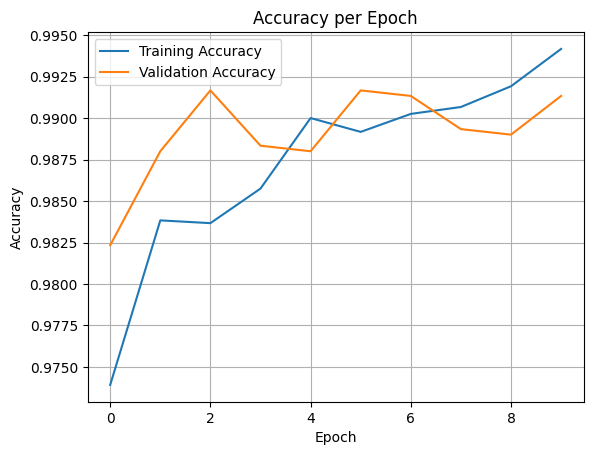

94/94 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step


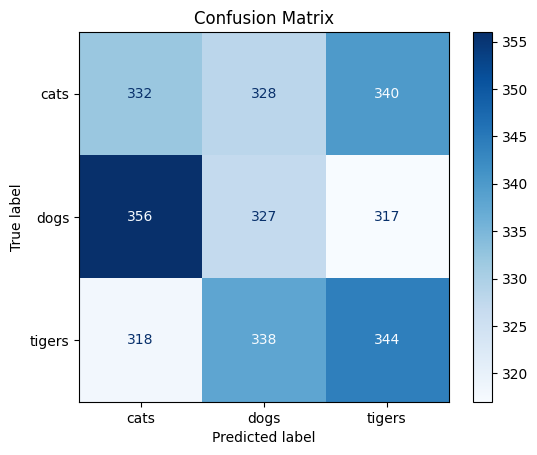

Classification Report:
              precision    recall  f1-score   support

        cats       0.33      0.33      0.33      1000
        dogs       0.33      0.33      0.33      1000
      tigers       0.34      0.34      0.34      1000

    accuracy                           0.33      3000
   macro avg       0.33      0.33      0.33      3000
weighted avg       0.33      0.33      0.33      3000



In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Training model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

# Visualisasi akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Prediksi label dari validation set
val_generator.reset()  # reset penting untuk predict agar urutan batch tepat
Y_pred = model.predict(val_generator, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(val_generator.classes, y_pred)
labels = list(val_generator.class_indices.keys())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Laporan klasifikasi
print("Classification Report:")
print(classification_report(val_generator.classes, y_pred, target_names=labels))


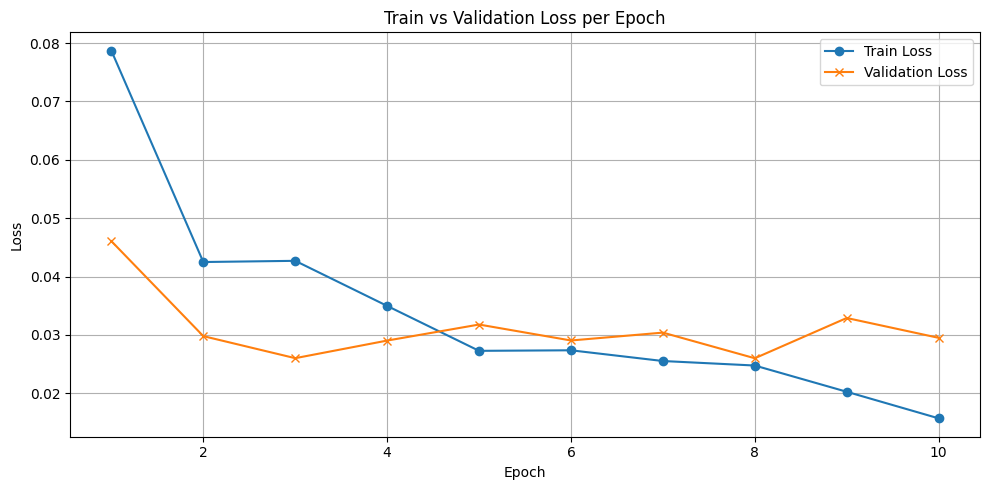

In [7]:
# Ambil loss dari history
train_losses = history.history['loss']
test_losses = history.history['val_loss']
epochs = len(train_losses)
epochs_range = range(1, epochs + 1)


plt.figure(figsize=(10, 5))
plt.plot(epochs_range, train_losses, label='Train Loss', marker='o')
plt.plot(epochs_range, test_losses, label='Validation Loss', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss per Epoch')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
print(train_generator.samples)
print(val_generator.samples)

12000
3000


In [9]:
print(train_generator.class_indices)


{'cats': 0, 'dogs': 1, 'tigers': 2}


In [10]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_single_image(img_path, model, class_indices):
    img = image.load_img(img_path, target_size=(224, 224))  # Sesuai input MobileNetV2
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalisasi

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    # Balik mapping label
    labels_map = {v: k for k, v in class_indices.items()}
    predicted_label = labels_map[predicted_class]

    print(f"Predicted: {predicted_label} | Confidence: {prediction[0][predicted_class]:.2f}")


In [25]:
# import torch # No longer needed for Keras model saving
# torch.save({ # No longer needed for Keras model saving
#     'model_state_dict': model.state_dict() # No longer needed for Keras model saving
# }, 'model_klasifikasi_hewan.pth') # No longer needed for Keras model saving

# Use model.save() for Keras models
model.save('model_klasifikasi_hewan.keras')

print("Model saved as model_klasifikasi_hewan.keras")

Model saved as model_klasifikasi_hewan.keras


In [26]:
import torch
import torch.nn as nn
from torchvision.models import resnet18

def load_model(checkpoint_path, num_classes, device):
    model = resnet18(weights=None)
    model.fc = nn.Linear(model.fc.in_features, num_classes)

    checkpoint = torch.load(checkpoint_path, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    model = model.to(device)
    model.eval()
    return model


In [27]:
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

def predict_image(image_path, model, device, class_names):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(image_tensor)
        _, pred = torch.max(outputs, 1)

    predicted_class = class_names[pred.item()]
    return predicted_class, image


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted: cats | Confidence: 1.00
Prediction: cats


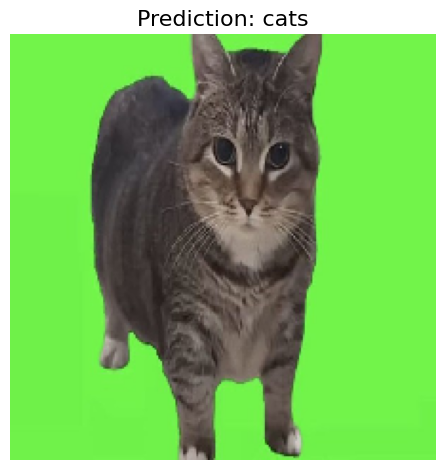

In [31]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load the saved Keras model
model = tf.keras.models.load_model('model_klasifikasi_hewan.keras')

# Sesuaikan label dengan dataset milikmu
# Get class names from the trained model's class_indices
# Make sure train_generator or the source of class_indices is available
# For now, using the example labels
class_names = ['cats', 'dogs', 'tigers'] # example labels, adjust as needed

# Ganti path ke gambar hewan untuk prediksi
img_path = '/content/hewan_dataset/dataset/test_set/dogs/image-59dda9e51b20f775d0ed842564000162_600x400.jpg'

# Use the predict_single_image function for Keras models
def predict_single_image(img_path, model, class_names):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_label = class_names[predicted_class_index]

    print(f"Predicted: {predicted_label} | Confidence: {predictions[0][predicted_class_index]:.2f}")
    return predicted_label, img # Return the PIL Image for plotting

predicted_label, image_to_show = predict_single_image(img_path, model, class_names)

print(f"Prediction: {predicted_label}")

# Tampilkan gambar dan prediksi
plt.imshow(image_to_show)
plt.axis('off')
plt.title(f"Prediction: {predicted_label}", fontsize=16)
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


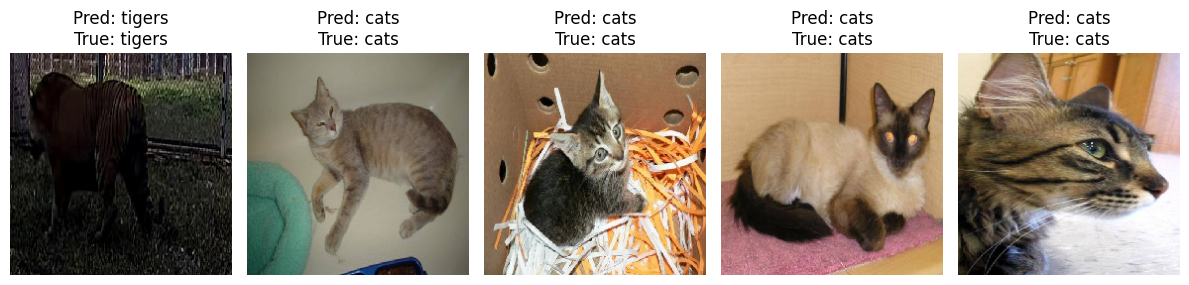

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Ambil beberapa batch dari val_generator
class_names = list(val_generator.class_indices.keys())

val_generator.reset()
images, labels = next(val_generator)

# Ambil 5 sampel gambar pertama
plt.figure(figsize=(12, 6))
for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])
    pred = model.predict(np.expand_dims(images[i], axis=0))
    pred_label = class_names[np.argmax(pred)]
    true_label = class_names[int(labels[i])]
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
    plt.axis("off")
plt.tight_layout()
plt.show()
